In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
df_train = pd.read_csv('train.csv')

In [6]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [7]:
df_train.describe().head()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000


In [8]:
df_train.shape

(13730, 167)

In [9]:
df_train['NU_NOTA_LC'].isnull().sum()
df_train['NU_NOTA_CN'].isnull().sum()
df_train['NU_NOTA_CH'].isnull().sum()
df_train['NU_NOTA_REDACAO'].isnull().sum()
df_train['NU_NOTA_MT'].isnull().sum()

3597

In [60]:
modaCH = df_train['NU_NOTA_CH'].mode()
modaCN = df_train['NU_NOTA_CN'].mode()
modaLC = df_train['NU_NOTA_LC'].mode()
modaMT = df_train['NU_NOTA_MT'].mode()
modaRD = df_train['NU_NOTA_REDACAO'].mode()

In [61]:
df_train['NU_NOTA_CH'].fillna(modaCH, inplace=True)
df_train['NU_NOTA_CN'].fillna(modaCN, inplace=True)
df_train['NU_NOTA_LC'].fillna(modaLC, inplace=True)
df_train['NU_NOTA_MT'].fillna(modaMT, inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(modaRD, inplace=True)

In [64]:
df_train[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CH']].head()

,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_CH
0,436.3,581.2,399.4,520.0,495.4
1,474.5,599.0,459.8,580.0,544.1
2,459.8,520.9,461.2,540.0,532.0
3,459.8,520.9,461.2,540.0,532.0
4,459.8,520.9,461.2,540.0,532.0


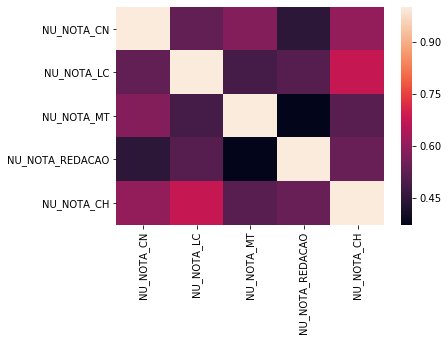

In [15]:
sns.heatmap(df_train[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_CH']].corr())

In [65]:
x = df_train[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_CH']]
y = df_train['NU_NOTA_MT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

print(x_train, y_train)

       NU_NOTA_CN  NU_NOTA_LC  NU_NOTA_REDACAO  NU_NOTA_CH
11646       459.8       520.9            540.0       532.0
4688        431.2       600.0            360.0       567.2
6304        459.8       520.9            540.0       532.0
4945        459.8       520.9            540.0       532.0
9111        499.7       638.8            820.0       636.6
10197       441.7       485.3            480.0       399.1
11143       434.4       605.6            460.0       562.6
13543       461.9       529.7            540.0       470.5
720         561.5       559.6            580.0       578.0
3478        459.8       520.9            540.0       532.0
7486        395.0       480.9            580.0       558.2
12758       459.8       520.9            540.0       532.0
5224        605.9       573.6            600.0       650.1
11868       452.3       587.6            580.0       581.2
1340        475.8       513.1            580.0       544.5
2804        452.3       474.2            500.0       475

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [68]:
r2_score(y_test, pred)

0.42206100999281215

In [69]:
df_test = pd.read_csv('test.csv')

In [70]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [71]:
df_test['NU_NOTA_CN'].fillna(0, inplace=True)
df_test['NU_NOTA_LC'].fillna(0, inplace=True)
df_test['NU_NOTA_CH'].fillna(0, inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(0, inplace=True)

In [72]:
x_pred = df_test[['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_CH']]
pred_test = lr.predict(x_pred)

In [53]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer['NU_NOTA_MT'] = pred_test

In [56]:
df_answer.to_csv('answer.csv')